In [1]:
%matplotlib inline

In [2]:
import xarray as xr

In [59]:
import os

In [39]:
from ARCCSSive import CMIP5
db=CMIP5.connect()
results = db.outputs(variable='thetao',experiment='historical',mip='Omon',model='ACCESS1-0',ensemble='r1i1p1')

In [57]:
dirpath = results[0].drstree_path()
dirpath

u'/g/data1/ua6/DRSv2/CMIP5/ACCESS1-0/historical/mon/ocean/r1i1p1/thetao/latest'

In [64]:
files = sorted(results[0].filenames())
files

[u'thetao_Omon_ACCESS1-0_historical_r1i1p1_185001-185412.nc',
 u'thetao_Omon_ACCESS1-0_historical_r1i1p1_185501-185912.nc',
 u'thetao_Omon_ACCESS1-0_historical_r1i1p1_186001-186412.nc',
 u'thetao_Omon_ACCESS1-0_historical_r1i1p1_186501-186912.nc',
 u'thetao_Omon_ACCESS1-0_historical_r1i1p1_187001-187412.nc',
 u'thetao_Omon_ACCESS1-0_historical_r1i1p1_187501-187912.nc',
 u'thetao_Omon_ACCESS1-0_historical_r1i1p1_188001-188412.nc',
 u'thetao_Omon_ACCESS1-0_historical_r1i1p1_188501-188912.nc',
 u'thetao_Omon_ACCESS1-0_historical_r1i1p1_189001-189412.nc',
 u'thetao_Omon_ACCESS1-0_historical_r1i1p1_189501-189912.nc',
 u'thetao_Omon_ACCESS1-0_historical_r1i1p1_190001-190412.nc',
 u'thetao_Omon_ACCESS1-0_historical_r1i1p1_190501-190912.nc',
 u'thetao_Omon_ACCESS1-0_historical_r1i1p1_191001-191412.nc',
 u'thetao_Omon_ACCESS1-0_historical_r1i1p1_191501-191912.nc',
 u'thetao_Omon_ACCESS1-0_historical_r1i1p1_192001-192412.nc',
 u'thetao_Omon_ACCESS1-0_historical_r1i1p1_192501-192912.nc',
 u'theta

In [65]:
ds = xr.open_mfdataset([os.path.join(dirpath,f) for f in files])

In [66]:
ds

<xarray.Dataset>
Dimensions:       (bnds: 2, i: 360, j: 300, lev: 50, time: 1872, vertices: 4)
Coordinates:
  * lev           (lev) float64 5.0 15.0 25.0 35.0 45.0 55.0 65.0 75.0 85.0 ...
  * j             (j) int32 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 ...
  * i             (i) int32 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 ...
    lat           (j, i) float32 -77.8766 -77.8766 -77.8766 -77.8766 ...
    lon           (j, i) float32 80.5 81.5 82.5 83.5 84.5 85.5 86.5 87.5 ...
  * time          (time) datetime64[ns] 1850-01-16T12:00:00 1850-02-15 ...
Dimensions without coordinates: bnds, vertices
Data variables:
    time_bnds     (time, bnds) float64 dask.array<shape=(1872, 2), chunksize=(60, 2)>
    lev_bnds      (time, lev, bnds) float64 dask.array<shape=(1872, 50, 2), chunksize=(60, 50, 2)>
    lat_vertices  (time, j, i, vertices) float32 dask.array<shape=(1872, 300, 360, 4), chunksize=(60, 300, 360, 4)>
    lon_vertices  (time, j, i, vertices) float32 dask.array<shape

In [67]:
ds.thetao

<xarray.DataArray 'thetao' (time: 1872, lev: 50, j: 300, i: 360)>
dask.array<shape=(1872, 50, 300, 360), dtype=float32, chunksize=(60, 50, 300, 360)>
Coordinates:
  * lev      (lev) float64 5.0 15.0 25.0 35.0 45.0 55.0 65.0 75.0 85.0 95.0 ...
  * j        (j) int32 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 ...
  * i        (i) int32 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 ...
    lat      (j, i) float32 -77.8766 -77.8766 -77.8766 -77.8766 -77.8766 ...
    lon      (j, i) float32 80.5 81.5 82.5 83.5 84.5 85.5 86.5 87.5 88.5 ...
  * time     (time) datetime64[ns] 1850-01-16T12:00:00 1850-02-15 ...
Attributes:
    standard_name:     sea_water_potential_temperature
    long_name:         Sea Water Potential Temperature
    units:             K
    original_units:    deg_C
    cell_methods:      time: mean
    cell_measures:     area: areacello volume: volcello
    associated_files:  baseURL: http://cmip-pcmdi.llnl.gov/CMIP5/dataLocation...

In [68]:
thetao_mean = ds.thetao.sel(time=slice('1980-01-01', '1999-12-31')).mean(dim='time')

In [69]:
thetao_mean

<xarray.DataArray 'thetao' (lev: 50, j: 300, i: 360)>
dask.array<shape=(50, 300, 360), dtype=float32, chunksize=(50, 300, 360)>
Coordinates:
  * lev      (lev) float64 5.0 15.0 25.0 35.0 45.0 55.0 65.0 75.0 85.0 95.0 ...
  * j        (j) int32 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 ...
  * i        (i) int32 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 ...
    lat      (j, i) float32 -77.8766 -77.8766 -77.8766 -77.8766 -77.8766 ...
    lon      (j, i) float32 80.5 81.5 82.5 83.5 84.5 85.5 86.5 87.5 88.5 ...

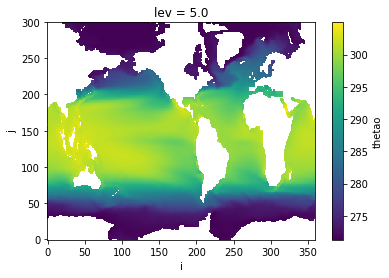

In [70]:
thetao_mean[0,].plot()